<a href="https://colab.research.google.com/github/slawek-programmer/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [8]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import os
import datetime

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color,exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
if y_train.ndim==1: y_train = to_categorical(y_train)
if y_test.ndim==1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [13]:
y_train.shape

(34799, 43)

In [0]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 13.3474 - accuracy: 0.7829


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     Flatten(),
                     Dense(num_classes, activation='softmax'),
  ])

def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tenserboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size',128),
      epochs=params_fit.get('epochs',5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data',(X_train,y_train)),
      callbacks=[tenserboard_callback]
      )
  
  return model

In [18]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model,X_train,y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 24.9269 - accuracy: 0.7543 - val_loss: 0.2420 - val_accuracy: 0.9395
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2151 - accuracy: 0.9507 - val_loss: 0.1902 - val_accuracy: 0.9595
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1307 - accuracy: 0.9690 - val_loss: 0.1080 - val_accuracy: 0.9765
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.0966 - accuracy: 0.9766 - val_loss: 0.0831 - val_accuracy: 0.9829
Epoch 5/5
272/272 [==============================] - 4s 17ms/step - loss: 0.0913 - accuracy: 0.9789 - val_loss: 0.0863 - val_accuracy: 0.9844


In [19]:
y_pred_probe = model_trained.predict(X_test)
y_pred_probe

array([[1.64856227e-14, 1.16035005e-06, 1.84600594e-05, ...,
        1.13330689e-05, 2.27634236e-03, 5.65997216e-05],
       [1.98961355e-12, 3.43243272e-07, 2.04985656e-04, ...,
        9.99638723e-05, 2.27905421e-05, 3.40551173e-06],
       [1.15492000e-15, 6.61130116e-07, 1.13088390e-06, ...,
        3.97793337e-06, 1.87907775e-03, 1.73723656e-05],
       ...,
       [2.60779029e-03, 9.98491235e-03, 8.31941701e-03, ...,
        1.01488177e-02, 2.52239294e-02, 9.33305919e-03],
       [7.19394395e-03, 7.94483349e-03, 1.62571017e-02, ...,
        1.34810265e-02, 2.50867978e-02, 3.88124143e-03],
       [3.57729662e-03, 7.18458882e-03, 6.66568568e-03, ...,
        2.62969686e-03, 1.48246475e-02, 4.22661367e-04]], dtype=float32)

In [20]:
y_pred_probe[400]

array([3.2139251e-08, 9.9999940e-01, 1.1219936e-09, 5.3115182e-18,
       6.0239989e-07, 7.1178753e-12, 9.9529045e-11, 2.1185879e-17,
       5.3741883e-19, 3.2443315e-16, 1.6822182e-17, 3.0913662e-20,
       3.9918949e-21, 8.6189465e-18, 6.2047666e-28, 3.1017001e-14,
       8.0959646e-14, 7.3062448e-25, 5.1931749e-16, 1.2654480e-32,
       4.4792626e-21, 1.9556788e-23, 9.4203331e-36, 3.0414632e-22,
       1.7291566e-22, 3.2207625e-26, 8.3512991e-22, 0.0000000e+00,
       1.3556816e-17, 3.9869407e-25, 3.1343966e-22, 2.6858386e-33,
       1.5215677e-24, 8.4738498e-23, 1.6439866e-28, 4.0287519e-19,
       9.0459372e-30, 1.8186127e-25, 1.0897040e-23, 0.0000000e+00,
       2.7084995e-22, 9.2079190e-18, 2.0201446e-17], dtype=float32)

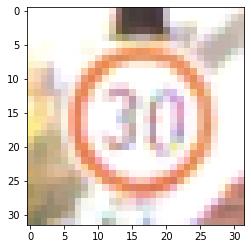

In [21]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [23]:
np.argmax(y_pred_probe[400])

1

In [24]:
labels_dict [np.argmax(y_pred_probe[400])]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained,X_test,y_test,scoring=accuracy_score):

  y_test_norm = np.argmax(y_test,axis=1)
  y_pred_prob = model_trained.predict(X_test)
  y_pred=np.argmax(y_pred_prob,axis=1)
  return scoring(y_test_norm,y_pred)



In [28]:
predict(model_trained,X_test,y_test)

0.8448979591836735

In [0]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict(model_trained,X_test,y_test)

def get_cnn_v2(input_shape,num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax'),
  ])

In [61]:
train_and_predict(get_cnn_v2(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 5.5570 - accuracy: 0.2805 - val_loss: 1.2851 - val_accuracy: 0.6662
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 1.3521 - accuracy: 0.6030 - val_loss: 0.6519 - val_accuracy: 0.8438
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.7516 - accuracy: 0.7752 - val_loss: 0.2275 - val_accuracy: 0.9521
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4345 - accuracy: 0.8705 - val_loss: 0.1126 - val_accuracy: 0.9761
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3030 - accuracy: 0.9135 - val_loss: 0.0631 - val_accuracy: 0.9893


0.9301587301587302

In [62]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict(model_trained,X_test,y_test)

def get_cnn_v3(input_shape,num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v3(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 2.2028 - accuracy: 0.5485 - val_loss: 0.3058 - val_accuracy: 0.9365
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.4474 - accuracy: 0.8730 - val_loss: 0.0891 - val_accuracy: 0.9827
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2510 - accuracy: 0.9290 - val_loss: 0.0495 - val_accuracy: 0.9890
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1700 - accuracy: 0.9506 - val_loss: 0.0334 - val_accuracy: 0.9929
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1215 - accuracy: 0.9653 - val_loss: 0.0172 - val_accuracy: 0.9961


0.9662131519274376

In [63]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict(model_trained,X_test,y_test)

def get_cnn_v4(input_shape,num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v4(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.4551 - accuracy: 0.3362 - val_loss: 1.0408 - val_accuracy: 0.6758
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.9209 - accuracy: 0.7145 - val_loss: 0.2403 - val_accuracy: 0.9378
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4149 - accuracy: 0.8736 - val_loss: 0.0956 - val_accuracy: 0.9731
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2662 - accuracy: 0.9187 - val_loss: 0.0593 - val_accuracy: 0.9825
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2029 - accuracy: 0.9382 - val_loss: 0.0378 - val_accuracy: 0.9900


0.9664399092970521

In [64]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict(model_trained,X_test,y_test)

def get_cnn_v5(input_shape,num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6112 - accuracy: 0.2850 - val_loss: 0.9708 - val_accuracy: 0.6771
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.9038 - accuracy: 0.7130 - val_loss: 0.3394 - val_accuracy: 0.8854
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4696 - accuracy: 0.8503 - val_loss: 0.1394 - val_accuracy: 0.9537
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.3089 - accuracy: 0.9033 - val_loss: 0.1044 - val_accuracy: 0.9657
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2341 - accuracy: 0.9295 - val_loss: 0.0504 - val_accuracy: 0.9862


0.9643990929705215

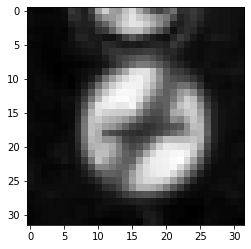

In [65]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [75]:
model = get_cnn_v5((32,32,1),num_classes)
model_trained = train_model(model,X_train_gray,y_train,params_fit={})
predict(model_trained,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.8171 - accuracy: 0.2179 - val_loss: 0.8560 - val_accuracy: 0.7386
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5879 - accuracy: 0.8093 - val_loss: 0.1172 - val_accuracy: 0.9666
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2392 - accuracy: 0.9248 - val_loss: 0.0714 - val_accuracy: 0.9785
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1529 - accuracy: 0.9524 - val_loss: 0.0319 - val_accuracy: 0.9917
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1157 - accuracy: 0.9631 - val_loss: 0.0298 - val_accuracy: 0.9905


0.9673469387755103

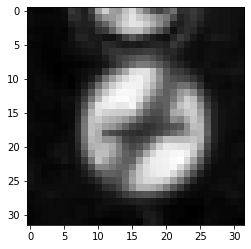

In [76]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))